In [1]:
from scipy.stats import chi2_contingency
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
# The data is showing the counts of customers in each satisfaction level for both types of devices:
data = [["Very Satisfied", 50, 70, 120],
    ["Satisfied",80, 100, 180],
    ["Neutral",60, 90, 150],
    ["Unsatisfied", 30, 50, 80],
    ["Very Unsatisfied", 20, 50, 70],
    ["Total", 240, 360, 600]
]
data

[['Very Satisfied', 50, 70, 120],
 ['Satisfied', 80, 100, 180],
 ['Neutral', 60, 90, 150],
 ['Unsatisfied', 30, 50, 80],
 ['Very Unsatisfied', 20, 50, 70],
 ['Total', 240, 360, 600]]

In [56]:
df=pd.DataFrame(data,

             columns=['Satisfaction','Smart Thermostat','Smart Light','Total']) # column names


In [57]:
df

,Satisfaction,Smart Thermostat,Smart Light,Total
0,Very Satisfied,50,70,120
1,Satisfied,80,100,180
2,Neutral,60,90,150
3,Unsatisfied,30,50,80
4,Very Unsatisfied,20,50,70
5,Total,240,360,600


Compute the Chi-Square Statistic:

<Axes: >

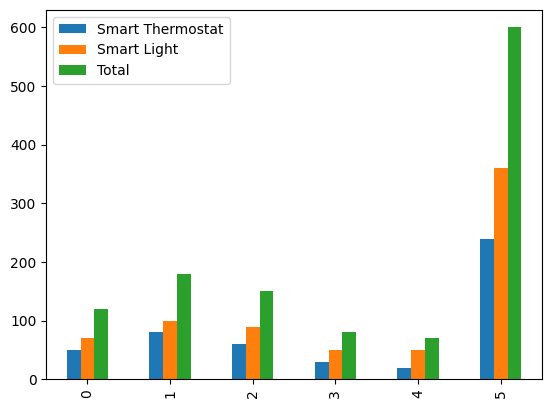

In [35]:
df.plot(kind='bar',
        stacked=False)


In [40]:
# Creating a DataFrame without the column names (for chi2 test, we only need numerical data)
df = pd.DataFrame(data[1:], columns=data[0])

In [41]:
# Creating a DataFrame without the column names (for chi2 test, we only need numerical data)
df = pd.DataFrame(data[1:], columns=data[0])

In [58]:
# Print the column names to check what's available
print(df.columns)

Index(['Satisfaction', 'Smart Thermostat', 'Smart Light', 'Total'], dtype='object')


In [59]:
df_numeric = df.drop(columns=["Total"])

In [61]:
df_numeric

,Satisfaction,Smart Thermostat,Smart Light
0,Very Satisfied,50,70
1,Satisfied,80,100
2,Neutral,60,90
3,Unsatisfied,30,50
4,Very Unsatisfied,20,50
5,Total,240,360


In [64]:
print(df.dtypes)  # Check the data types of the columns


Satisfaction        object
Smart Thermostat     int64
Smart Light          int64
Total                int64
dtype: object


In [66]:
# Drop any non-numeric columns if necessary (assuming the first column is non-numeric)
df_numeric = df.iloc[:, 1:]  # Exclude the first column if it's non-numeric

In [67]:
# Convert all data to numeric (just in case there are strings)
df_numeric = df_numeric.apply(pd.to_numeric)

In [71]:
# Perform the Chi-Square test
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, ex = chi2_contingency(df_numeric)


In [74]:
chi2_contingency(df_numeric)

Chi2ContingencyResult(statistic=5.638227513227513, pvalue=0.8446871739958809, dof=10, expected_freq=array([[ 48.,  72., 120.],
       [ 72., 108., 180.],
       [ 60.,  90., 150.],
       [ 32.,  48.,  80.],
       [ 28.,  42.,  70.],
       [240., 360., 600.]]))

In [76]:
chi2_stat

5.638227513227513

In [77]:
p_val

0.8446871739958809

In [78]:
dof

10

In [79]:
ex

array([[ 48.,  72., 120.],
       [ 72., 108., 180.],
       [ 60.,  90., 150.],
       [ 32.,  48.,  80.],
       [ 28.,  42.,  70.],
       [240., 360., 600.]])

State the hypothesis:

In [80]:
# taking the threshold value as 0.05 or 5%
if p_val < 0.05:
    print(" We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

We can accept the null hypothesis


3. Determine the Critical Value:

In [84]:
# Convert all columns to numeric data types
df_numeric = df_numeric.apply(pd.to_numeric)

In [85]:
# Perform the Chi-Square test to get degrees of freedom
_, _, dof, _ = chi2_contingency(df_numeric)

In [91]:
# Set significance level
alpha = 0.05

In [93]:
# Determine the critical value
critical_value = chi2.ppf(1 - alpha, dof)

In [98]:
# Printing the results
print(f"Critical Value at alpha = {alpha}: {critical_value}")

Critical Value at alpha = 0.05: 18.307038053275146


Decision making stage:

In [99]:
# Compare the Chi-Square statistic with the critical value
if chi2_stat > critical_value:
    print("Reject the null hypothesis (H₀). There is a significant difference in the distribution of responses.")
else:
    print("Fail to reject the null hypothesis (H₀). There is no significant difference in the distribution of responses.")

Fail to reject the null hypothesis (H₀). There is no significant difference in the distribution of responses.
